In [1]:
#The original dataset was taken from kaggle, we downloaded it from kaggle and uploadaed to our own drive for ease access.
#Mounting the drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#import basics python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torchvision
import torch
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import numpy as np
from sklearn.preprocessing import LabelEncoder
import torch.nn as nn
from torchvision.models import vgg16
from sklearn.model_selection import train_test_split
import torch.nn.functional as Fun
from torch.optim.lr_scheduler import ExponentialLR
from sklearn.preprocessing import MinMaxScaler

In [3]:
df_init = pd.read_csv('/content/drive/MyDrive/curated_dataset.csv')

In [4]:
df_init.head()

,Unnamed: 0,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,Others,vidir_modern


In [5]:
skin_path = '/content/drive/MyDrive/Final folder/'

In [6]:
df_init['path'] = skin_path+df_init['image_id']+'.jpg'

In [7]:
df_init

,Unnamed: 0,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path
0,0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00274...
1,1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00250...
2,2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00267...
3,3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00256...
4,4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,Others,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00316...
...,...,...,...,...,...,...,...,...,...,...
10010,10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00330...
10011,10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00335...
10012,10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00335...
10013,10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00328...


In [8]:
from sklearn.preprocessing import MinMaxScaler 
# df_init['age']= df_init['age'] / df_init['age'].abs().max()
df_init['age'] =MinMaxScaler().fit_transform(np.array(df_init['age']).reshape(-1,1))

In [9]:
df_init

,Unnamed: 0,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path
0,0,HAM_0000118,ISIC_0027419,bkl,histo,0.941176,male,scalp,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00274...
1,1,HAM_0000118,ISIC_0025030,bkl,histo,0.941176,male,scalp,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00250...
2,2,HAM_0002730,ISIC_0026769,bkl,histo,0.941176,male,scalp,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00267...
3,3,HAM_0002730,ISIC_0025661,bkl,histo,0.941176,male,scalp,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00256...
4,4,HAM_0001466,ISIC_0031633,bkl,histo,0.882353,male,Others,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00316...
...,...,...,...,...,...,...,...,...,...,...
10010,10010,HAM_0002867,ISIC_0033084,akiec,histo,0.470588,male,abdomen,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00330...
10011,10011,HAM_0002867,ISIC_0033550,akiec,histo,0.470588,male,abdomen,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00335...
10012,10012,HAM_0002867,ISIC_0033536,akiec,histo,0.470588,male,abdomen,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00335...
10013,10013,HAM_0000239,ISIC_0032854,akiec,histo,0.941176,male,face,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00328...


In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [11]:
device

'cuda'

In [12]:
lb = LabelEncoder()
df_init.dx =  lb.fit_transform(df_init.dx)
diseases_en =  dict(zip(lb.classes_, lb.transform(lb.classes_)))
df_init.sex = lb.fit_transform(df_init.sex)
sex_en = dict(zip(lb.classes_, lb.transform(lb.classes_)))
df_init.localization = lb.fit_transform(df_init.localization)
local_en = dict(zip(lb.classes_, lb.transform(lb.classes_)))

In [13]:
print(diseases_en, sex_en, local_en)

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6} {'Others': 0, 'female': 1, 'male': 2} {'Others': 0, 'abdomen': 1, 'back': 2, 'chest': 3, 'face': 4, 'foot': 5, 'hand': 6, 'lower extremity': 7, 'neck': 8, 'scalp': 9, 'trunk': 10, 'upper extremity': 11}


In [14]:
df_init.dx.value_counts()

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: dx, dtype: int64

In [15]:
class SkinDataset(Dataset):
    def __init__(self, df):
#         self.df = pd.read_csv(df)
        self.fpath = df.path
        self.label = df.dx
        self.age= df.age
        self.localization = df.localization
        self.sex = df.sex
        self.transforms = T.Compose(
        [T.ToTensor(),
        T.Normalize(mean=[0.485,
           0.456, 0.406],std=[0.229, 0.224, 0.225])]
        )
    def __len__(self):
        return len(self.fpath)
    
    def __getitem__(self,ix):
        f = self.fpath[ix]
        label = self.label[ix]
        sex = self.sex[ix]
        location = self.localization[ix]
        age = self.age[ix]
        im = cv2.imread(f)
        im = cv2.resize(im, (224,224))
        im = self.transforms(im) 
        tabular = [sex, location, age]
        tabular = torch.Tensor(tabular).to(torch.float)

        return torch.tensor(im,dtype=torch.float).to(device), torch.tensor(label, dtype=torch.float).long().to(device),torch.tensor(tabular, dtype=torch.float).long().to(device)

In [16]:
data = SkinDataset(df_init)
img, label, tdata = data[90]

<ipython-input-15-291f1b8f8039>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(im,dtype=torch.float).to(device), torch.tensor(label, dtype=torch.float).long().to(device),torch.tensor(tabular, dtype=torch.float).long().to(device)


In [17]:
img, label, tdata

(tensor([[[-1.8097, -1.8097, -1.7412,  ..., -1.5870, -1.6555, -1.7069],
          [-1.7240, -1.7412, -1.7069,  ..., -1.6213, -1.6213, -1.6384],
          [-1.7069, -1.6898, -1.6898,  ..., -1.5699, -1.6213, -1.6384],
          ...,
          [-2.0837, -2.1008, -2.0494,  ..., -2.0665, -2.0665, -2.0837],
          [-2.0837, -2.1179, -2.0494,  ..., -2.0837, -2.0665, -2.0665],
          [-2.0494, -2.0837, -2.0665,  ..., -2.1008, -2.0665, -2.0665]],
 
         [[-1.8081, -1.8431, -1.7906,  ..., -1.7206, -1.7556, -1.8081],
          [-1.7906, -1.8256, -1.7906,  ..., -1.7031, -1.7381, -1.7731],
          [-1.8081, -1.7731, -1.7906,  ..., -1.6681, -1.7556, -1.7381],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.3687, -1.3861, -1.3861,  ..., -1.1944, -1.2990, -1.3339],
          [-1.3339, -1.3513,

In [18]:
import torch
import torch.nn as nn
import torchvision
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.model = torchvision.models.vgg16(pretrained=True)
    for param in self.model.features.parameters():
                   param.requires_grad = False


    self.numeric_features_ = nn.Sequential(
        nn.Linear(3,64),
        nn.ReLU(inplace=True),
        nn.Dropout(0.2),
        nn.Linear(64,64*64),
        nn.ReLU(inplace=True),
        nn.Dropout(0.2),
    )
    
    self.combined_ = nn.Sequential(
        nn.Linear(64*64 + 1000, 512),
        nn.ReLU(inplace=True),
        nn.Dropout(),
        nn.Linear(512, 128),
        nn.ReLU(inplace=True),
        nn.Dropout(),
        nn.Linear(128, 7),
        nn.Softmax()
    )

  def forward(self, input1, age):
    image_features = self.model(input1)
    numerical_features = self.numeric_features_(torch.tensor((age)))
    # numerical_features = numerical_features.view(numerical_features.size(0), -1)
    combined_features = torch.hstack((image_features, numerical_features.reshape(-1,64)))
    return self.combined_(combined_features)

    
model = NeuralNetwork()
model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [19]:
df_init

,Unnamed: 0,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path
0,0,HAM_0000118,ISIC_0027419,2,histo,0.941176,2,9,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00274...
1,1,HAM_0000118,ISIC_0025030,2,histo,0.941176,2,9,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00250...
2,2,HAM_0002730,ISIC_0026769,2,histo,0.941176,2,9,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00267...
3,3,HAM_0002730,ISIC_0025661,2,histo,0.941176,2,9,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00256...
4,4,HAM_0001466,ISIC_0031633,2,histo,0.882353,2,0,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00316...
...,...,...,...,...,...,...,...,...,...,...
10010,10010,HAM_0002867,ISIC_0033084,0,histo,0.470588,2,1,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00330...
10011,10011,HAM_0002867,ISIC_0033550,0,histo,0.470588,2,1,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00335...
10012,10012,HAM_0002867,ISIC_0033536,0,histo,0.470588,2,1,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00335...
10013,10013,HAM_0000239,ISIC_0032854,0,histo,0.941176,2,4,vidir_modern,/content/drive/MyDrive/Final folder/ISIC_00328...


In [20]:
X = df_init[['path', 'age', 'sex', 'localization']]

In [21]:
df_train_X, df_test_X, df_train_y, df_test_y = train_test_split(df_init[['path', 'age', 'sex', 'localization']], df_init.dx, stratify = df_init.dx,test_size=0.3)

In [22]:
df = pd.concat([df_train_X,df_train_y], axis=1).reset_index(drop=True)

In [23]:
df_test = pd.concat([df_test_X, df_test_y], axis=1).reset_index(drop=True)

In [24]:
print(len(df), len(df_test))

7010 3005


In [25]:
total = len(df)
weights = [(1 / (len(df[df['dx']==i]))) for i in range(7) ]
weights = torch.tensor(weights).to(device)

total = len(df_test)
weights_test = [(1 / (len(df_test[df_test['dx']==i]))) for i in range(7) ]
weights_test = torch.tensor(weights_test).to(device)

In [26]:
from torch.utils.data import WeightedRandomSampler
sampler = WeightedRandomSampler(weights=weights, num_samples = 2*len(df))
sampler_test = WeightedRandomSampler(weights=weights_test, num_samples = 2*len(df_test))

In [27]:
def get_data():
    train = SkinDataset(df)
    test = SkinDataset(df_test)
    trn_dl = DataLoader(train, batch_size=32, sampler=sampler, drop_last=True)
    test_dl = DataLoader(test, batch_size=32, sampler=sampler_test, drop_last=True)
    return trn_dl, test_dl

In [28]:
def train_batch(img, label, age , model, loss_fn, opt):
    model.train()
    input1 = img.to(device)
    prediction = model(input1,torch.tensor(age).to(torch.float).to(device))
    batch_loss = loss_fn(prediction, label)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [29]:
@torch.no_grad()
def accuracy(img, y, age, model):
    model.eval()
    input1 = img.to(device)
    pred = model(input1,torch.tensor(age).to(torch.float).to(device))
    _, is_correct = torch.max(pred.data,1)
    acc_all = (is_correct==y).detach().cpu().numpy()
    return acc_all

In [30]:
@torch.no_grad()
def val_loss_trn(x, y,age, model, loss_fn):
  input1 = x.to(device)
  prediction = model(input1,torch.tensor(age).to(torch.float).to(device))
  val_loss = loss_fn(prediction, y)
  return val_loss.item()

In [31]:
trn_ldr, test_ldr = get_data()

In [32]:
model = model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [33]:
train_loss = []
train_accuracies= []
val_loss = [] 
val_accuracies = []

for i in range(10):
    print(f'Epoch: _________*****{i}*****_______')
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_accuracies, val_epoch_losses = [], []


    for ix, batch in (enumerate(iter(trn_ldr))):
      img, label, tab = batch
      train_epoch_losses.append(train_batch(img, label,tab, model, loss_fn, optimizer))
    train_epoch_loss = np.array(train_epoch_losses).mean()
    print(f'Epoch: _________*****{i} Training Loss : {train_epoch_loss} *****_______')



    for ix, batch in (enumerate(iter(trn_ldr))):
        img, label, tab = batch
        # x = x.permute(0, 3,1,2)
        train_epoch_accuracies.append(sum(accuracy(img, label,tab, model,)) / len(label))
    train_epoch_accuracy = np.array(train_epoch_accuracies).mean()
    print(f'Epoch: _________*****{i} Training Accuracy: {train_epoch_accuracy} *****_______')


    for ix, batch in (enumerate(iter(test_ldr))):
        img, label, tab = batch
        # x = x.permute(0, 3,1,2)
        val_epoch_losses.append(val_loss_trn(img, label,tab, model, loss_fn))
    val_epoch_loss = np.array(val_epoch_losses).mean()
    print(f'Epoch: _________*****{i} Validation Loss : {val_epoch_loss} *****_______')

    for ix, batch in (enumerate(iter(test_ldr))):
        img, label, tab = batch
        # x = x.permute(0, 3,1,2)
        val_epoch_accuracies.append(sum(accuracy(img, label,tab, model)) / len(label))
    val_epoch_accuracy = np.array(val_epoch_accuracies).mean()
    print(f'Epoch: _________*****{i} Validation Accuracy. {val_epoch_accuracy} *****_______')
    print('\n')

    train_loss.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_accuracies.append(val_epoch_accuracy)
    val_loss.append(val_epoch_loss)

Epoch: _________*****0*****_______


<ipython-input-15-291f1b8f8039>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(im,dtype=torch.float).to(device), torch.tensor(label, dtype=torch.float).long().to(device),torch.tensor(tabular, dtype=torch.float).long().to(device)
<ipython-input-28-446066984c85>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prediction = model(input1,torch.tensor(age).to(torch.float).to(device))
<ipython-input-18-d6c818c9bfda>:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  numerical_features = self.numeric_features_(torch.tensor(

Epoch: _________*****0 Training Loss : 1.2495006644018165 *****_______


<ipython-input-29-7dfa359be168>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = model(input1,torch.tensor(age).to(torch.float).to(device))


Epoch: _________*****0 Training Accuracy: 0.9125285388127854 *****_______
Epoch: _________*****0 Validation Loss : 1.3764847077150395 *****_______
Epoch: _________*****0 Validation Accuracy. 0.7859291443850267 *****_______


Epoch: _________*****1*****_______
Epoch: _________*****1 Training Loss : 1.249825534210902 *****_______
Epoch: _________*****1 Training Accuracy: 0.912029109589041 *****_______
Epoch: _________*****1 Validation Loss : 1.3873469906057265 *****_______
Epoch: _________*****1 Validation Accuracy. 0.7924465240641712 *****_______


Epoch: _________*****2*****_______
Epoch: _________*****2 Training Loss : 1.2578877444680967 *****_______
Epoch: _________*****2 Training Accuracy: 0.9130993150684932 *****_______
Epoch: _________*****2 Validation Loss : 1.3784900521212082 *****_______
Epoch: _________*****2 Validation Accuracy. 0.7919451871657754 *****_______


Epoch: _________*****3*****_______
Epoch: _________*****3 Training Loss : 1.251609206199646 *****_______
Epoch: ___

KeyboardInterrupt: ignored

In [34]:
torch.save(model.to('cpu').state_dict(), '/content/skin_fulldatamodel.pth')

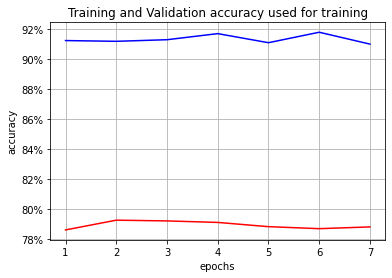

In [36]:
epochs = np.arange(7) + 1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(epochs, train_accuracies, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
plt.title('Training and Validation accuracy used for training')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.grid('off')
plt.show()

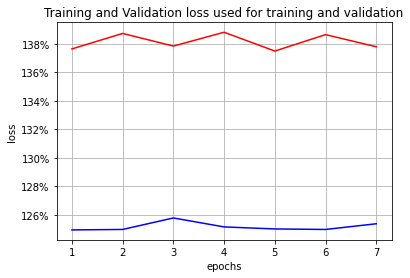

In [37]:
epochs = np.arange(7) + 1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
plt.title('Training and Validation loss used for training and validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.grid('off')
plt.show()